In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import seaborn as sns

In [8]:
raw_data = pd.read_csv('data/titanic.csv', header=0)
raw_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [9]:
raw_data = raw_data.drop(columns = 'Name')
raw_data['Fare'] = raw_data['Fare'].round(0) 
raw_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.314543
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.782385
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,8.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


array([3, 1, 2], dtype=int64)

In [26]:
raw_data['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [ ]:
sns.countplot(x='Survived',data=raw_data)
plt.title('Not Survived vs Survived')
plt.show()

In [6]:
print('the data is imbalanced')

the data is imbalanced


In [10]:
final_data = pd.get_dummies(raw_data, columns =['Sex','Pclass'], drop_first=True)
final_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.0,1,0,1
1,1,38.0,1,0,71.0,0,0,0
2,1,26.0,0,0,8.0,0,0,1
3,1,35.0,1,0,53.0,0,0,0
4,0,35.0,0,0,8.0,1,0,1


In [ ]:
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [174]:
print('created dummy variables/features to avoid ')

created dummy variables/features to avoid 


In [44]:
X = final_data.loc[:,final_data.columns != 'Survived']
y = final_data.loc[:,final_data.columns == 'Survived']

from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

smt = SMOTE(random_state=0)
data_X,data_y=smt.fit_sample(X_train, y_train)


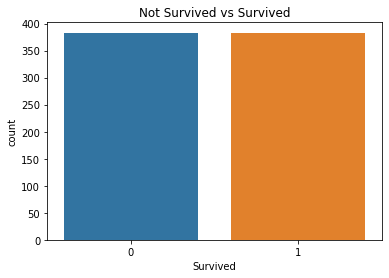

In [45]:
sns.countplot(x='Survived',data=data_y)
plt.title('Not Survived vs Survived')
plt.show()

In [53]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(data_X, data_y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[134  28]
 [ 30  75]]


In [56]:
#different perfomance matric 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       162
           1       0.73      0.71      0.72       105

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



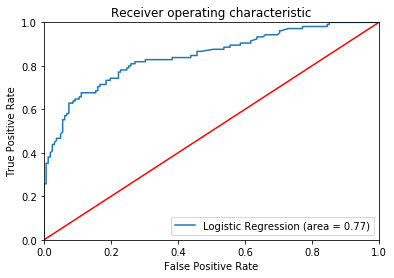

In [57]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()